In [1]:
import torch.nn as nn
import librosa
import numpy as np
import torch
import torch.utils.data
import matplotlib.pyplot as plt
import IPython.display as ipd
import os
from torch.autograd import Variable

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

# os.chdir('/content/drive/My Drive/Colab Notebooks')

In [3]:
training_folder = 'tr'
validation_folder = 'v'
test_folder = 'te'
file_extension = '.wav'
train_dirty_file_path = 'numpy_files/file_names/train/train_dirty_files.npy'
train_speech_file_path = 'numpy_files/file_names/train/train_speech_files.npy'
train_noise_file_path = 'numpy_files/file_names/train/train_noise_files.npy'

train_librosa_n_list_path = 'numpy_files/librosa_data/train/train_n_list.npy'
train_librosa_s_list_path = 'numpy_files/librosa_data/train/train_s_list.npy'
train_librosa_x_list_path = 'numpy_files/librosa_data/train/train_x_list.npy'

train_librosa_complex_list_path = 'numpy_files/librosa_data/train/train_complex_list.npy'

test_dirty_file_path = 'numpy_files/file_names/test/test_dirty_files.npy'
test_librosa_x_list_path = 'numpy_files/librosa_data/test/test_x_list.npy'
test_librosa_complex_list_path = 'numpy_files/librosa_data/test/test_complex_list.npy'
dimension = 513
file_count_to_denoise = 10
load_existing_files = False
test_files_count = 5
epochs = 1
sample_rate = 16000
save_files = True

In [4]:
def get_file_number(number):
    return "0" * (4 - len(number)) + number + file_extension

In [5]:
def file_exists(file):
  return os.path.isfile(file)

In [6]:
def get_files(folder, test=False):
  dirty_files = []
  speech_files = []
  noise_files = []
  for i in range(file_count_to_denoise):
      dirty_files.append(folder+'/' + folder + 'x'  + get_file_number(str(i)))
      if not test:
        speech_files.append(folder+'/' + folder +'s' + get_file_number(str(i)))
        noise_files.append(folder+ '/' + folder + 'n' + get_file_number(str(i)))
  if not test:
    return np.array(dirty_files), np.array(speech_files), np.array(noise_files)
  return np.array(dirty_files)

In [7]:
if load_existing_files:
  print('loading existing files')
  train_dirty_files = np.load(train_dirty_file_path)
  train_speech_files = np.load(train_speech_file_path)
  train_noise_files = np.load(train_noise_file_path)

else:
  train_dirty_files, train_speech_files, train_noise_files = get_files(training_folder)

train_dirty_files = train_dirty_files[:file_count_to_denoise].reshape(file_count_to_denoise, 1)
train_speech_files = train_speech_files[:file_count_to_denoise].reshape(file_count_to_denoise,1)
train_noise_files = train_noise_files[:file_count_to_denoise].reshape(file_count_to_denoise,1)
  
if save_files:
  np.save(train_dirty_file_path, train_dirty_files)
  np.save(train_speech_file_path, train_speech_files)
  np.save(train_noise_file_path, train_noise_files)
 
# test_dirty_files, test_speech_files, test_noise_files = get_files(test_folder)


In [8]:
print(train_dirty_files.shape)
print(train_speech_files.shape)

(10, 1)
(10, 1)


In [9]:
def get_processed_lists(dirty_files, speech_files, noise_files, test=False):
  x_list = np.zeros(shape=(dimension,1))
  x_complex = np.zeros(shape=(dimension,1))
  s_list = np.zeros(shape=(dimension,1))
  n_list = np.zeros(shape=(dimension,1))
  for i in range(file_count_to_denoise):
      print("Running for tile", str(i))
  #     for dirty files
      x, srx=librosa.load(dirty_files[i][0], sr=None)
      X=librosa.stft(x, n_fft=1024, hop_length=512)
  #     for speech files
    
      s, srs=librosa.load(speech_files[i][0], sr=None)
      S=librosa.stft(s, n_fft=1024, hop_length=512)
    #     for noise files
      n, srn=librosa.load(noise_files[i][0], sr=None)
      N=librosa.stft(n, n_fft=1024, hop_length=512)
      
      
      x_abs = np.abs(X)
      s_abs = np.abs(S)
      n_abs = np.abs(N)
      
      if x_list.shape[1] == 1:
          x_list = x_abs
          x_complex = X
          s_list = s_abs
          n_list = n_abs
      else:  
          x_list = np.append(x_list, x_abs,1)
          x_complex = np.append(x_complex, X, 1)
          s_list = np.append(s_list, s_abs,1)
          n_list = np.append(n_list, n_abs,1)

  x_list = x_list.T
  x_complex = x_complex.T
  
  n_list = n_list.T
  s_list = s_list.T
   

  return s_list,n_list,x_list, x_complex

In [10]:
def get_processed_list_test(dirty_files):
  x_list = []
  x_complex = []
    
  for i in range(test_files_count):
      print("Running for tile", str(i))
  #     for dirty files
      x, srx=librosa.load(dirty_files[i][0], sr=None)
      X=librosa.stft(x, n_fft=1024, hop_length=512)
      
      
      x_abs = np.abs(X)
 
      x_list.append(x_abs)
      x_complex.append(X)

  return x_list, x_complex

In [11]:
if load_existing_files:
  train_s_list = np.load(train_librosa_s_list_path)
  train_n_list = np.load(train_librosa_n_list_path)
  train_x_list = np.load(train_librosa_x_list_path)
  train_x_complex = np.load(train_librosa_complex_list_path)
else:
  train_s_list, train_n_list, train_x_list, train_x_complex = get_processed_lists(train_dirty_files, train_speech_files, train_noise_files)

Running for tile 0
Running for tile 1
Running for tile 2
Running for tile 3
Running for tile 4
Running for tile 5
Running for tile 6
Running for tile 7
Running for tile 8
Running for tile 9


In [12]:
if save_files:
  np.save(train_librosa_s_list_path, train_s_list)
  np.save(train_librosa_n_list_path, train_n_list)
  np.save(train_librosa_x_list_path, train_x_list)
  np.save(train_librosa_complex_list_path, train_x_complex)

In [13]:
print(train_s_list.shape)
print(train_x_list.shape)
print(train_x_complex.shape)

(650, 513)
(650, 513)
(650, 513)


In [14]:
def get_IBM(n_list, s_list):
  length = len(s_list)
  ibm_list = np.zeros(shape=(length,513))
  for i in range(length):
    ibm = np.zeros(len(s_list[i]))
    ibm[s_list[i] > n_list[i]] = 1
    ibm_list[i] = ibm
  return ibm_list 
  

In [15]:

ibm = get_IBM(train_n_list, train_s_list)

In [16]:
ibm = np.expand_dims(ibm, 2)
train_x_list = np.expand_dims(train_x_list, 2)

In [17]:
# BATCH = 10
# train_loader = torch.utils.data.DataLoader(train_x_list, batch_size=BATCH)
# test_loader = torch.utils.data.DataLoader(ibm, batch_size=BATCH)

In [18]:
#Ref : https://nipunbatra.github.io/blog/2018/denoising.html
class GRU(nn.Module):
    
#     def step(self, pred):
#         greater = pred >=0.5
#         less = pred < 0.5
#         pred[greater] = 1
#         pred[less] = 0
#         return pred
  
    def __init__(self, input_size, hidden_size):
        super(GRU, self).__init__()
        self.rnn = nn.LSTM(input_size=input_size, hidden_size=hidden_size)
        self.linear = nn.Linear(hidden_size, 1)
        self.act = torch.sigmoid
        
    def forward(self, x):
        pred, hidden = self.rnn(x, None)
        pred = self.act(self.linear(pred)).view(pred.data.shape[0], -1, 1)
        
#         greater = pred >=0.5
#         less = pred < 0.5
#         pred[greater] = 1
#         pred[less] = 0
        return pred
model = GRU(1, 1).cuda()
print(model)

GRU(
  (rnn): LSTM(1, 1)
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


torch.Size([650, 513, 1])
torch.Size([650, 513, 1])
Epoch0 Loss0.20849176


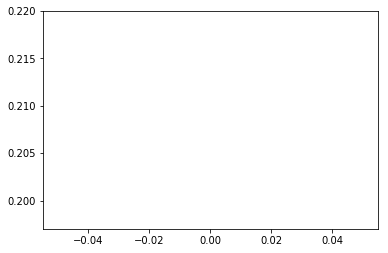

In [19]:

loss_function= nn.MSELoss()
para = model.parameters()
optimizer = torch.optim.Adam(params=para, lr=0.001)
loss_list = []
x_train = train_x_list
y_train = ibm
for i in range(epochs):            
    model_input = Variable(torch.Tensor(x_train.reshape((x_train.shape[0], -1, 1))), requires_grad=True).cuda()
    target = Variable(torch.Tensor(y_train.reshape((y_train.shape[0], -1, 1))) ).cuda()
    optimizer.zero_grad()
    network_output  = model(model_input)
    print(network_output.shape)
    print(target.shape)
    loss = loss_function(network_output , target)
    loss.backward()
    optimizer.step()
    numpy_loss = loss.data.cpu().numpy()
    print("Epoch" + str(i) , "Loss" + str(numpy_loss))
    loss_list.append(numpy_loss)
plt.plot(range(epochs), loss_list)
plt.show()      

In [20]:
# validation_dirty_files, validation_speech_files, validation_noise_files = get_files(validation_folder)
if load_existing_files:
  test_dirty_files = np.load(test_dirty_file_path)
else:
  test_dirty_files = get_files(test_folder, True)


In [21]:
test_dirty_files = test_dirty_files.reshape(test_dirty_files.shape[0], 1)

In [22]:
print(test_dirty_files.shape)
if save_files:
  np.save(test_dirty_file_path, test_dirty_files)

(10, 1)


**--------------------------------------------------------------------------------------------------Testing Begins-----------------------------------------------------**

In [23]:
# validation_s_list, validation_n_list, validation_x_list = get_processed_lists(validation_dirty_files, validation_speech_files, validation_noise_files)
if load_existing_files:
  test_x_list = np.load(test_librosa_x_list_path)
  test_x_complex = np.load(test_librosa_complex_list_path)
else:
  test_x_list, test_x_complex = get_processed_list_test(test_dirty_files)
x_list = test_x_list

Running for tile 0
Running for tile 1
Running for tile 2
Running for tile 3
Running for tile 4


In [26]:
if save_files:
  np.save(test_librosa_x_list_path, test_x_list)
  np.save(test_librosa_complex_list_path, test_x_complex)

In [39]:
x_list[0].shape

(513, 110)

In [38]:
x_list[0].reshape(x_list[0].shape[0],x_list[0].shape[1], 1).shape

(513, 110, 1)

In [48]:
output_istft = []
for i in range(len(x_list)):
    model_input = Variable(torch.Tensor(x_list[i].reshape(x_list[i].shape[0],x_list[i].shape[1], 1)))
    prediction = model(model_input.cuda())
    y = prediction.detach().cpu().numpy()
    print(y.shape)
#     print(test_x_complex.shape)
#     print(y.shape)
    result = np.multiply(test_x_complex[i],y.reshape(y.shape[0],y.shape[1]))
    # spec_istft = librosa.istft(spec, hop_length=512)
    result_istft = librosa.istft(result, hop_length=512)
    result_istft = result_istft.reshape(result_istft.shape[0],1)
    output_istft.append(result_istft)
#     print(result.shape)

(513, 110, 1)
(513, 110, 1)
(513, 110, 1)
(513, 110, 1)
(513, 110, 1)


In [49]:
# prediction = 1 * (prediction > 0.5)

In [50]:
# m_input =  model_input.detach().numpy()

# spec = (m_input.reshape(dimension,result.shape[0]) / np.abs(m_input).reshape(dimension,result.shape[0])) * result.T

In [51]:
# print(srs)
# print(srn)
# print(srx)
# librosa.output.write_wav('validation2.wav', spec_istft, srs)
librosa.output.write_wav('test_result.wav', output_istft[0], sample_rate)

In [52]:
# ipd.Audio('validation2.wav')


In [53]:
ipd.Audio('test_result.wav')

In [ ]:
# s = test_x_complex
# print(s.shape)
# y = y.reshape(result.shape[0], dimension)
# print(y.shape)
# print(np.max(y))

In [ ]:
# print(10*np.log10(np.sum(np.square(test_x_complex)/(np.sum(np.square(np.subtract(test_x_complex ,y)))))))